## Importar librerias

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargar datos

In [5]:
df = pd.read_excel('/content/drive/MyDrive/DD360/liquidity_challenge.xlsx')

In [6]:
df.head()

,property_id,event,time2event,property_type,surface_total,num_bathrooms,num_bedrooms,marketplace_hash,seller_hash,num_parking_lots,...,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area
0,069c4d09-1f4e-4451-bf9f-23130537bb37,1,96,apartment,120.0,2.5,2.0,-2.900368e+18,-7946976479905633280,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0a4c5851-88ae-4d33-8fb7-f7d50ca85389,0,37,apartment,82.0,2.0,2.0,8.261012e+18,1284474136562356992,2.0,...,1,0,0,0,0,0,1,1,0,0
2,9d31a760-0ffd-44df-b77e-28fe6e1b019d,1,88,apartment,84.0,2.0,2.0,1.657070e+18,-3834970849644356096,1.0,...,0,0,0,0,0,0,0,0,0,0
3,fb141128-2a00-4117-929d-ca7ef507d2ab,1,58,apartment,92.0,2.0,2.0,-2.900368e+18,-7946976479905633280,0.0,...,1,0,0,0,0,0,1,0,0,0
4,b334cf18-5c23-4914-947a-d545c439845f,0,95,apartment,55.0,1.0,1.0,8.261012e+18,377027056504647872,1.0,...,1,1,1,0,1,0,1,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740 entries, 0 to 4739
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   property_id                   4740 non-null   object        
 1   event                         4740 non-null   int64         
 2   time2event                    4740 non-null   int64         
 3   property_type                 4740 non-null   object        
 4   surface_total                 4740 non-null   float64       
 5   num_bathrooms                 4645 non-null   float64       
 6   num_bedrooms                  4646 non-null   float64       
 7   marketplace_hash              4645 non-null   float64       
 8   seller_hash                   4740 non-null   int64         
 9   num_parking_lots              4645 non-null   float64       
 10  first_price                   4740 non-null   float64       
 11  last_price                    

## ¿Cuántas propiedades se vendieron?

In [8]:
sold = df['event'][df['event'] == 1].count()
unsold = df['event'][df['event'] == 0].count()
print("Propiedades vendidas: ", sold)
print("Propiedades no vendidas: ", unsold)

Propiedades vendidas:  2827
Propiedades no vendidas:  1913


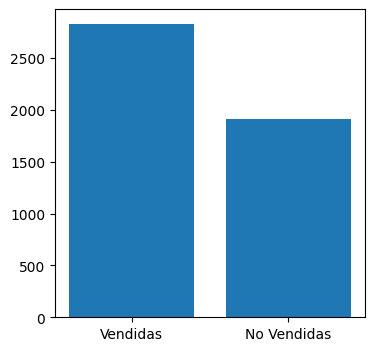

In [9]:
plt.figure(figsize=(4, 4))
plt.bar(["Vendidas", "No Vendidas"], [sold, unsold])
plt.show()

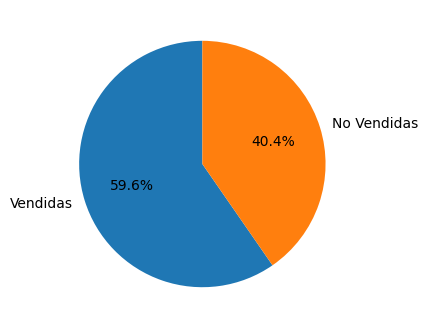

In [10]:
plt.figure(figsize=(4, 4))
plt.pie([sold*100/(sold+unsold), unsold*100/(sold+unsold)],labels=["Vendidas", "No Vendidas"], autopct='%1.1f%%', startangle=90)
plt.show()

## ¿En cuánto tiempo se vendieron las propiedades?

In [11]:
sold = df['time2event'][df['event'] == 1]

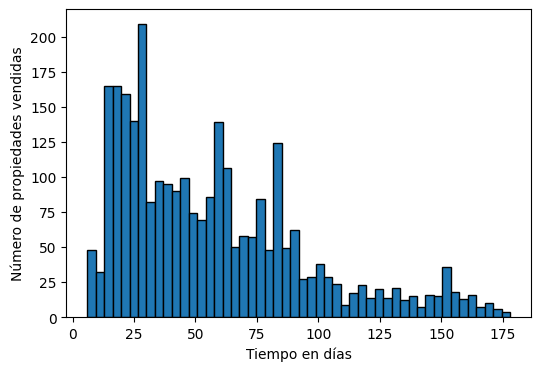

In [12]:
plt.figure(figsize=(6, 4))
plt.hist(sold.to_numpy(), bins=50, edgecolor='black')
plt.xlabel('Tiempo en días')
plt.ylabel('Número de propiedades vendidas')
plt.show()

### Tiempo promedio en que se vende una propiedad

In [13]:
print(round(df['time2event'][df['event'] == 1].mean()), "días")

57 días


### Tiempo máximo en que se vende una propiedad

In [14]:
print(df['time2event'][df['event'] == 1].max(), "días")

178 días


### Tiempo mínimo en que se vende una propiedad

In [15]:
print(df['time2event'][df['event'] == 1].min(), "días")

6 días


## ¿Qué pasa con las propiedades no vendidas?

In [16]:
unsold = df['time2event'][df['event'] == 0]

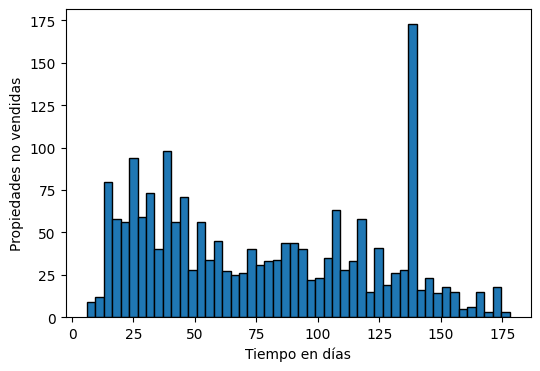

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(unsold.to_numpy(), bins=50, edgecolor='black')
plt.xlabel('Tiempo en días')
plt.ylabel('Propiedades no vendidas')
plt.show()

## Tipo de propiedad

In [18]:
apartment_sold = df['event'][(df['property_type'] == "apartment") & (df['event'] == 1)].count()
apartment_unsold = df['event'][(df['property_type'] == "apartment") & (df['event'] == 0)].count()

In [19]:
house_sold = df['event'][(df['property_type'] == "house") & (df['event'] == 1)].count()
house_unsold = df['event'][(df['property_type'] == "house") & (df['event'] == 0)].count()

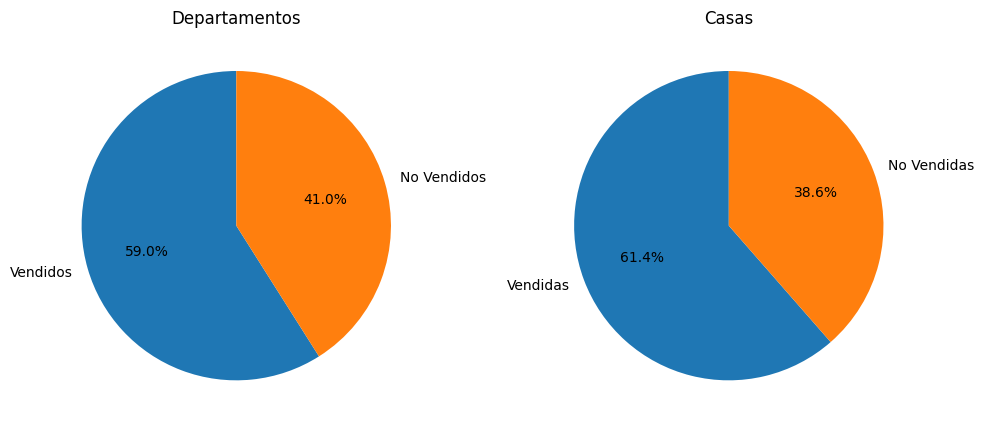

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie([apartment_sold*100/(apartment_sold+apartment_unsold), apartment_unsold*100/(apartment_sold+apartment_unsold)],
           labels=["Vendidos", "No Vendidos"], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Departamentos')
axs[1].pie([house_sold*100/(house_sold+house_unsold), house_unsold*100/(house_sold+house_unsold)],
           labels=["Vendidas", "No Vendidas"], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Casas')
plt.tight_layout()
plt.show()

### Propiedades vendidas por tipo

In [21]:
apartment = df['event'][(df['event'] == 1) & (df['property_type'] == "apartment")].count()
house = df['event'][(df['event'] == 1) & (df['property_type'] == "house")].count()

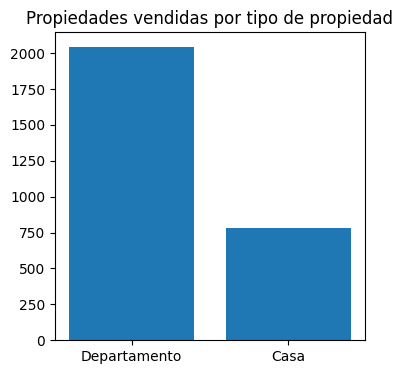

In [22]:
plt.figure(figsize=(4, 4))
plt.bar(["Departamento", "Casa"], [apartment, house])
plt.title("Propiedades vendidas por tipo de propiedad")
plt.show()

# Predecir tiempo de venta

### Quitamos las columnas que no vamos a utlizar del dataframe

In [23]:
columns = ['property_id', 'marketplace_hash', 'seller_hash',
'longitude', 'latitude', 'first_observed_date', 'last_observed_date'
]
data = df[df.columns.difference(columns)]
data.head()

,event,first_price,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,...,has_washing_area,last_price,num_bathrooms,num_bedrooms,num_marketplaces_property_at,num_parking_lots,property_type,surface_total,time2event,views
0,1,4100000.0,0,1,0,0,0,0,0,0,...,0,4100000.0,2.5,2.0,1,1.0,apartment,120.0,96,51
1,0,4900000.0,1,1,0,0,0,0,0,1,...,0,4900000.0,2.0,2.0,1,2.0,apartment,82.0,37,61
2,1,2782696.0,0,0,0,0,0,0,0,0,...,0,2782696.0,2.0,2.0,3,1.0,apartment,84.0,88,50
3,1,5280000.0,1,1,0,0,0,0,0,1,...,0,5280000.0,2.0,2.0,2,0.0,apartment,92.0,58,68
4,0,3250000.0,0,1,1,1,0,1,0,1,...,0,3250000.0,1.0,1.0,6,1.0,apartment,55.0,95,58


### Elimiar valores nulos y las propiedades no vendidas

In [24]:
data.dropna(inplace=True)
data = data[data['event'] == 1]
data = data.drop('event', axis=1)

<ipython-input-24-ef823ba5323a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


### Cambiamos el tipo de dato de property_type a un valor numérico

In [25]:
data['property_type'][data['property_type'] == "apartment"] = 1
data['property_type'][data['property_type'] == "house"] = 0

<ipython-input-25-a5316f281e6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['property_type'][data['property_type'] == "apartment"] = 1
<ipython-input-25-a5316f281e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['property_type'][data['property_type'] == "house"] = 0


### Calcúlamos como se correlacionan las variables

In [26]:
data.corr()['time2event']

<ipython-input-26-260b3be7bbae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['time2event']


first_price                     0.043894
has_balcony                     0.035846
has_elevator                    0.024885
has_garden                     -0.013180
has_gym                        -0.006790
has_luxury_features             0.005436
has_pool                        0.011009
has_studio                     -0.020566
has_surveillance                0.047326
has_terrace                     0.027971
has_visitors_parking            0.001970
has_washing_area               -0.013387
last_price                      0.045677
num_bathrooms                   0.031148
num_bedrooms                    0.002222
num_marketplaces_property_at   -0.135326
num_parking_lots               -0.010631
surface_total                   0.015975
time2event                      1.000000
views                          -0.061546
Name: time2event, dtype: float64

### Dividimos las variables en variale dependiente y variables independientes

In [27]:
X = data.drop('time2event', axis=1).to_numpy()
y = data['time2event'].to_numpy()

### Separamos datos en entenamiento y prueba

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Regresión Lineal

In [29]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
model = LinearRegression()
pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

### Evaluación del model sobre datos de test

In [30]:
y_pred = pipe.predict(X_test)
print("Coeficiente de Determinación: ", r2_score(y_test, y_pred))
print("Error Absoluto Medio", mean_absolute_error(y_test, y_pred))

Coeficiente de Determinación:  0.01681698273842025
Error Absoluto Medio 30.62762029652999


## Bosque Aleatorio

In [31]:
scaler = StandardScaler()
model = RandomForestRegressor(max_depth=5)
pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(max_depth=5))])

### Evaluación del model sobre datos de test

In [32]:
y_pred = pipe.predict(X_test)
print("Coeficiente de Determinación: ", r2_score(y_test, y_pred))
print("Error Absoluto Medio", mean_absolute_error(y_test, y_pred))

Coeficiente de Determinación:  0.01692035445389095
Error Absoluto Medio 30.73213888637995


## Perceptro Multicapa

In [33]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
model = MLPRegressor(hidden_layer_sizes=(500,), max_iter=1000)
pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 MLPRegressor(hidden_layer_sizes=(500,), max_iter=1000))])

### Evaluación del model sobre datos de test

In [34]:
y_pred = pipe.predict(X_test)
print("Coeficiente de Determinación: ", r2_score(y_test, y_pred))
print("Error Absoluto Medio", mean_absolute_error(y_test, y_pred))

Coeficiente de Determinación:  -0.14754627965353406
Error Absoluto Medio 33.21981995137044
